## Assignment: Group–Project 
**ITE 351: AI & Applications**

<u>**Group members:**</u>

[TODO]

The recommended format is the following:\
Title of your project\
Members: Name1, Department, University, Email\
Name2, Department, University, Email\
I. Introduction\
- Motivation: Why are you doing this?\
- What do you want to see at the end?\
II. Datasets\
- Describing your dataset\
III. Methodology\
- Explaining your choice of algorithms (methods)\
- Explaining features or code (if any)\
IV. Evaluation & Analysis\
- Graphs, tables, any statistics (if any)\
V. Related Work (e.g., existing studies)\
- Tools, libraries, blogs, or any documentation that you have used to do this project.\
VI. Conclusion: Discussion\

## Introduction

## Dataset

In [1]:
#Loading the csv file and get data
import pandas as pd
data = pd.DataFrame()
path_data_tesla = '../Datasets/Original/TSLA.csv'
trade_data_tesla = pd.read_csv(path_data_tesla ,sep = ',',)
trade_data_tesla.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


In [2]:
def sort_datas(trade_data):
    order = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    
    selected_data = [col for col in order if col in trade_data.columns]
    # Sortiere die Spalten gemäß der gewünschten Reihenfolge
    trade_data = trade_data[selected_data]
    return trade_data


def combine_data(trade_datas):
    if len(trade_datas) == 0:
        return None
    ref_columns = list(trade_datas[0].columns)
    for data in trade_datas[1:]:
        if list(data.columns) != ref_columns:
            raise ValueError("Wrong coloumn order")
    combined_data = pd.concat(trade_datas, ignore_index=True)
    return combined_data

In [3]:
def modify_data(trade_data, t_previous_days, t_label_days):
    #
    columns_names = ['Open', 'High', 'Low', 'Close', 'Volume']

    # Kopie des DataFrames erstellen
    modified_trade_data = trade_data.copy()
    t_previous_days = 30

    for attribute in columns_names:
        for i in range(1, t_previous_days + 1):
            deviation_col_name = f'deviation_{attribute}_{i}'
            modified_trade_data[deviation_col_name] = modified_trade_data[attribute] - modified_trade_data[attribute].shift(i)
            
            average_deviation_col_name = f'average_deviation_{attribute}'
            modified_trade_data[average_deviation_col_name] = modified_trade_data[[f'deviation_{attribute}_{j}' for j in range(1, i + 1)]].mean(axis=1)

        positive_deviation_col_name = f'positive_deviations_{attribute}'
        modified_trade_data[positive_deviation_col_name] = 0
        for i in range(1, t_previous_days + 1):
            modified_trade_data[positive_deviation_col_name] += (modified_trade_data[f'deviation_{attribute}_{i}'] > 0).astype(int)

        negative_deviation_col_name = f'negative_deviations_{attribute}'
        modified_trade_data[negative_deviation_col_name] = 0
        for i in range(1, t_previous_days + 1):
            modified_trade_data[negative_deviation_col_name] += (modified_trade_data[f'deviation_{attribute}_{i}'] < 0).astype(int)

    for i in range(1, t_previous_days + 1):
        diff_col_name_open_close = f'difference_open_close_{i}'
        modified_trade_data[diff_col_name_open_close] = modified_trade_data['Open'] - modified_trade_data['Close'].shift(i)
        

        diff_col_name = f'difference_high_low_{i}'
        modified_trade_data[diff_col_name] = modified_trade_data[attribute] - modified_trade_data[attribute].shift(i)

    average_diff_col_name = f'average_difference_high_low'
    modified_trade_data[average_diff_col_name] = modified_trade_data[diff_col_name].rolling(window=t_previous_days).mean()
    average_diff_col_name_open_close = f'average_difference_open_close'
    modified_trade_data[average_diff_col_name_open_close] = modified_trade_data[diff_col_name_open_close].rolling(window=t_previous_days).mean()


    modified_trade_data.dropna(inplace=True)
    modified_trade_data.head()

    ######
    column_names = modified_trade_data.columns.tolist()
    
    modified_trade_data.dropna(inplace=True)

    deviation_values = []
    for i in range(1, t_label_days + 1):
        deviation_col_name = f'deviation_{i}'
        modified_trade_data[deviation_col_name] = modified_trade_data['Low'].diff(i)
        deviation_values.append(modified_trade_data[deviation_col_name])


    average_deviation = sum(deviation_values) / t_label_days

    modified_trade_data['Label'] = 0  # Initialisierung aller Labels als 0
    modified_trade_data = modified_trade_data[t_label_days:]
    average_deviation= average_deviation[t_label_days:]


    for index, deviation_value in average_deviation.items():
        
        if deviation_value < 0:
            modified_trade_data.loc[index, 'Label'] = 0
        else:
            modified_trade_data.loc[index, 'Label'] = 1

    #modified_trade_data.head(20)
    return modified_trade_data

    #modified_trade_data.to_csv('modifierd_trade_data.csv', index=False)






In [4]:
t_previous_days = 30
t_label_days = 10

modified = sort_datas(trade_data_tesla)
modified_trade_data_tesla_v1 = modify_data(modified, t_previous_days, t_label_days)



#TODO: add other datasets

modified_trade_data_tesla_v2 = modify_data(modified, t_previous_days, t_label_days)

#modified_trade_data = combine_data([modified_trade_data_tesla_v1, modified_trade_data_tesla_v1])



/tmp/ipykernel_8466/1334267008.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  modified_trade_data[positive_deviation_col_name] = 0
/tmp/ipykernel_8466/1334267008.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  modified_trade_data[negative_deviation_col_name] = 0
/tmp/ipykernel_8466/1334267008.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def plot_label_visualization(data):
    data['Date'] = pd.to_datetime(data['Date'])

    # Zufällige Auswahl von 3 Datenpunkten mit Label 1 und 0
    label_1_points = data[data['Label'] == 1].sample(n=3)
    label_0_points = data[data['Label'] == 0].sample(n=3)

    plt.figure(figsize=(8, 5))

    # Plot der Datenreihe
    plt.plot(data['Date'], data['Low'], label='Data', color='lightblue')

    # Scatter-Plot für Label 1 und Label 0
    plt.scatter(label_1_points['Date'], label_1_points['Low'], color='green', label='Label 1', s=100)
    plt.scatter(label_0_points['Date'], label_0_points['Low'], color='red', label='Label 0', s=100)

    # Berechnung und Zeichnung der vertikalen Linien 150 Tage nach jedem Punkt
    for idx, point in label_1_points.iterrows():
        plt.axvline(point['Date'] + pd.Timedelta(days=t_label_days), color='green', linestyle='--', alpha=0.7)
        
    for idx, point in label_0_points.iterrows():
        plt.axvline(point['Date'] + pd.Timedelta(days=t_label_days), color='red', linestyle='--', alpha=0.7)

    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Low')
    plt.title('Prediction for an increase of value (Label = 1)')

    # Setze Achsenbeschriftung auf jährliche Intervalle
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.gcf().autofmt_xdate()

    plt.show()

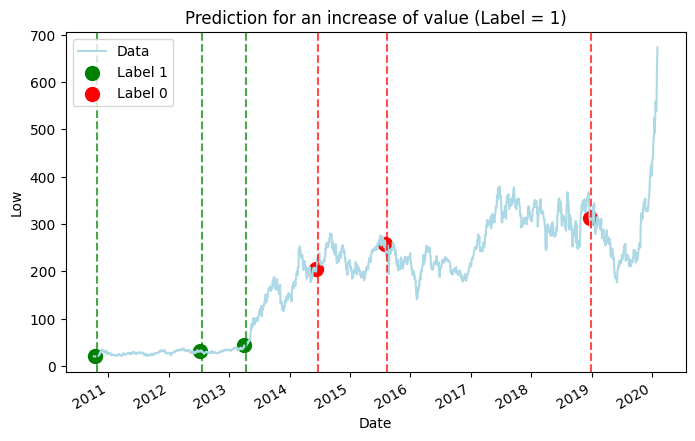

In [6]:
plot_label_visualization(modified_trade_data_tesla_v1)

In [7]:
# #
# columns_names = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# # Kopie des DataFrames erstellen
# modified_trade_data = trade_data.copy()
# t_previous_days = 30

# for attribute in columns_names:
#     for i in range(1, t_previous_days + 1):
#         deviation_col_name = f'deviation_{attribute}_{i}'
#         modified_trade_data[deviation_col_name] = modified_trade_data[attribute] - modified_trade_data[attribute].shift(i)
        
#         average_deviation_col_name = f'average_deviation_{attribute}'
#         modified_trade_data[average_deviation_col_name] = modified_trade_data[[f'deviation_{attribute}_{j}' for j in range(1, i + 1)]].mean(axis=1)

#     positive_deviation_col_name = f'positive_deviations_{attribute}'
#     modified_trade_data[positive_deviation_col_name] = 0
#     for i in range(1, t_previous_days + 1):
#         modified_trade_data[positive_deviation_col_name] += (modified_trade_data[f'deviation_{attribute}_{i}'] > 0).astype(int)

#     negative_deviation_col_name = f'negative_deviations_{attribute}'
#     modified_trade_data[negative_deviation_col_name] = 0
#     for i in range(1, t_previous_days + 1):
#         modified_trade_data[negative_deviation_col_name] += (modified_trade_data[f'deviation_{attribute}_{i}'] < 0).astype(int)

# for i in range(1, t_previous_days + 1):
#     diff_col_name_open_close = f'difference_open_close_{i}'
#     modified_trade_data[diff_col_name_open_close] = modified_trade_data['Open'] - modified_trade_data['Close'].shift(i)
    

#     diff_col_name = f'difference_high_low_{i}'
#     modified_trade_data[diff_col_name] = modified_trade_data[attribute] - modified_trade_data[attribute].shift(i)

# average_diff_col_name = f'average_difference_high_low'
# modified_trade_data[average_diff_col_name] = modified_trade_data[diff_col_name].rolling(window=t_previous_days).mean()
# average_diff_col_name_open_close = f'average_difference_open_close'
# modified_trade_data[average_diff_col_name_open_close] = modified_trade_data[diff_col_name_open_close].rolling(window=t_previous_days).mean()


# modified_trade_data.dropna(inplace=True)
# modified_trade_data.head()


In [8]:
# column_names = modified_trade_data.columns.tolist()
# t_label_days = 10
# modified_trade_data.dropna(inplace=True)

# deviation_values = []
# for i in range(1, t_label_days + 1):
#     deviation_col_name = f'deviation_{i}'
#     modified_trade_data[deviation_col_name] = modified_trade_data['Low'].diff(i)
#     deviation_values.append(modified_trade_data[deviation_col_name])


# average_deviation = sum(deviation_values) / t_label_days

# modified_trade_data['Label'] = 0  # Initialisierung aller Labels als 0
# modified_trade_data = modified_trade_data[t_label_days:]
# average_deviation= average_deviation[t_label_days:]


# for index, deviation_value in average_deviation.items():
    
#     if deviation_value < 0:
#         modified_trade_data.loc[index, 'Label'] = 0
#     else:
#         modified_trade_data.loc[index, 'Label'] = 1

# modified_trade_data.head(20)

# modified_trade_data.to_csv('modifierd_trade_data.csv', index=False)




In [9]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import pandas as pd

# df = modified_trade_data.copy()

# # Umwandlung der 'Date'-Spalte in ein Datumsformat
# df['Date'] = pd.to_datetime(df['Date'])

# # Zufällige Auswahl von 3 Datenpunkten mit Label 1 und 0
# label_1_points = df[df['Label'] == 1].sample(n=3)
# label_0_points = df[df['Label'] == 0].sample(n=3)

# plt.figure(figsize=(8, 5))

# # Plot der Datenreihe
# plt.plot(df['Date'], df['Low'], label='Data', color='lightblue')

# # Scatter-Plot für Label 1 und Label 0
# plt.scatter(label_1_points['Date'], label_1_points['Low'], color='green', label='Label 1', s=100)
# plt.scatter(label_0_points['Date'], label_0_points['Low'], color='red', label='Label 0', s=100)

# # Berechnung und Zeichnung der vertikalen Linien 150 Tage nach jedem Punkt
# for idx, point in label_1_points.iterrows():
#     plt.axvline(point['Date'] + pd.Timedelta(days=t_label_days), color='green', linestyle='--', alpha=0.7)
    
# for idx, point in label_0_points.iterrows():
#     plt.axvline(point['Date'] + pd.Timedelta(days=t_label_days), color='red', linestyle='--', alpha=0.7)

# plt.legend()
# plt.xlabel('Date')
# plt.ylabel('Low')
# plt.title('Prediction for an increase of value (Label = 1)')

# # Setze Achsenbeschriftung auf jährliche Intervalle
# plt.gca().xaxis.set_major_locator(mdates.YearLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# plt.gcf().autofmt_xdate()

# plt.show()


## Methodology

In [10]:
!pip install seaborn


In [11]:
!pip install scikit-learn


In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

def run_decision_tree_classifier_by_sklearn(modified_trade_data):
    features = modified_trade_data.iloc[:, 1:-1]
    labels = modified_trade_data['Label']  # Das Label, das vorhergesagt werden soll
    # Teile den Datensatz in Trainings- und Testdaten auf
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


    decision_tree_model_sklearn = DecisionTreeClassifier()

    decision_tree_model_sklearn.fit(X_train, y_train)

    y_pred_decision_tree_sklearn = decision_tree_model_sklearn.predict(X_test)

    # Evaluierung der Vorhersagegenauigkeit
    accuracy_decision_tree_sklearn = metrics.accuracy_score(y_test, y_pred_decision_tree_sklearn)
    return decision_tree_model_sklearn, y_pred_decision_tree_sklearn, accuracy_decision_tree_sklearn, y_test

In [13]:
decision_tree_model_sklearn_v1, y_pred_decision_tree_sklearn_v1, accuracy_decision_tree_sklearn_v1, y_test_dt_v1 = run_decision_tree_classifier_by_sklearn(modified_trade_data_tesla_v1)
decision_tree_model_sklearn_v2, y_pred_decision_tree_sklearn_v2, accuracy_decision_tree_sklearn_v2, y_test_dt_v2 = run_decision_tree_classifier_by_sklearn(modified_trade_data_tesla_v2)

In [14]:
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import metrics


# features = modified_trade_data.iloc[:, 1:-1]
# labels = modified_trade_data['Label']  # Das Label, das vorhergesagt werden soll
# # Teile den Datensatz in Trainings- und Testdaten auf
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


# decision_tree_model_sklearn = DecisionTreeClassifier()

# decision_tree_model_sklearn.fit(X_train, y_train)

# y_pred_decision_tree_sklearn = decision_tree_model_sklearn.predict(X_test)

# # Evaluierung der Vorhersagegenauigkeit
# accuracy_decision_tree_sklearn = metrics.accuracy_score(y_test, y_pred_decision_tree_sklearn)
# print("Accuracy:", accuracy_decision_tree_sklearn)

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def run_random_forest_classifier_by_sklearn(modified_trade_data):
    features = modified_trade_data.iloc[:, 1:-1]
    labels = modified_trade_data['Label']  # Das Label, das vorhergesagt werden soll
    # Teile den Datensatz in Trainings- und Testdaten auf
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

    # Build model and train(fit) it
    random_forest_model_sklearn = RandomForestClassifier(n_estimators=200, random_state=42)
    random_forest_model_sklearn.fit(X_train, y_train)

    # Test model by predicting based on the test data
    y_pred_random_forest_sklearn = random_forest_model_sklearn.predict(X_test)

    # Evaluation and calculaction of the accuracy
    accuracy_random_forest_sklearn = accuracy_score(y_test, y_pred_random_forest_sklearn)
    return random_forest_model_sklearn, y_pred_random_forest_sklearn, accuracy_random_forest_sklearn, y_test

In [16]:
# random_forest_model_sklearn_v1, y_pred_random_forest_sklearn_v1, accuracy_random_forest_sklearn_v1, y_test_rf_v1 = run_random_forest_classifier_by_sklearn(modified_trade_data_tesla_v1)
# random_forest_model_sklearn_v2, y_pred_random_forest_sklearn_v2, accuracy_random_forest_sklearn_v2, y_test_rf_v2 = run_random_forest_classifier_by_sklearn(modified_trade_data_tesla_v2)

In [17]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score


# features = modified_trade_data.iloc[:, 1:-1]
# labels = modified_trade_data['Label']  

# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# # Build model and train(fit) it
# random_forest_model_sklearn = RandomForestClassifier(n_estimators=200, random_state=42)
# random_forest_model_sklearn.fit(X_train, y_train)

# # Test model by predicting based on the test data
# y_pred_random_forest_sklearn = random_forest_model_sklearn.predict(X_test)

# # Evaluation and calculaction of the accuracy
# accuracy_random_forest_sklearn = accuracy_score(y_test, y_pred_random_forest_sklearn)
# print("Accuracy:", accuracy_random_forest_sklearn)



### Models written in scratch

### Decision Tree written in scratch

In [18]:
import numpy as np
import pandas as pd

class Tree_Node():
    def __init__(self, feature_index=None, threshold=None, branch_1=None, branch_2=None, improvment=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.branch_1 = branch_1
        self.branch_2= branch_2
        self.improvment = improvment
        self.value = value

class DecisionTree():
    def __init__(self, min_datas_branching=7, max_depth=10):
        self.root = None        
        self.min_datas_branching = min_datas_branching
        self.max_depth = max_depth
        
    def create_tree(self, dataset, curr_depth=0):
        data = dataset[:,:-1]
        label = dataset[:,-1]
        number_of_datas, number_of_features = np.shape(data)
        
        if number_of_datas>self.min_datas_branching and curr_depth<=self.max_depth and number_of_datas > number_of_features:
            best_branching = self.get_best_branching(dataset, number_of_datas, number_of_features)

            if best_branching["improvment"]>0: #if ==0, the node only consists of one type of class
                branch_1_subtree = self.create_tree(best_branching["dataset_branch_1"], curr_depth+1)
                branch_2_subtree = self.create_tree(best_branching["dataset_branch_2"], curr_depth+1)
                return Tree_Node(best_branching["feature_index"], best_branching["threshold"], branch_1_subtree, branch_2_subtree, best_branching["improvment"])
        
        leaf_value = self.calculate_leaf_value(label)
        return Tree_Node(value=leaf_value)
    
    def get_best_branching(self, dataset, number_of_datas, number_of_features):
        best_branching = {}
        max_improvment = -float("inf") 

        for feature_index in range(number_of_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_branch_1, dataset_branch_2= self.branch_tree(dataset, feature_index, threshold)
                if len(dataset_branch_1)>0 and len(dataset_branch_2)>0:
                    label, label_branch_1, label_branch_2 = dataset[:, -1], dataset_branch_1[:, -1], dataset_branch_2[:, -1]
                    new_improvment = self.information_gain(label, label_branch_1, label_branch_2, "gini")
                    if new_improvment>max_improvment:
                        best_branching["feature_index"] = feature_index
                        best_branching["threshold"] = threshold
                        best_branching["dataset_branch_1"] = dataset_branch_1
                        best_branching["dataset_branch_2"] = dataset_branch_2
                        best_branching["improvment"] = new_improvment
                        max_improvment = new_improvment
        return best_branching
    
    def branch_tree(self, dataset, feature_index, threshold):
        dataset_branch_1 = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_branch_2= np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_branch_1, dataset_branch_2
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        weight_branch_a = len(l_child) / len(parent)
        weight_branch_b = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_branch_a*self.gini_index(l_child) + weight_branch_b*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_branch_a*self.entropy(l_child) + weight_branch_b*self.entropy(r_child))
        return gain
    
    def entropy(self, y):        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):     
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, label):
        label = list(label)
        return max(label, key=label.count)
    
    def print_tree(self, tree=None, indent=" "):
        if not tree:
            tree = self.root

        if tree.value is not None:
            i = 0
        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.improvment)
            print("%sbranch_1:" % (indent), end="")
            self.print_tree(tree.branch_1, indent + indent)
            print("%sbranch_2:" % (indent), end="")
            self.print_tree(tree.branch_2, indent + indent)
    
    def fit(self, data, label):
        label_array = label.reshape(-1, 1)
        dataset = np.concatenate((data, label_array), axis=1)

        self.root = self.create_tree(dataset)
    
    def predict(self, data): 
        preditions = [self.make_prediction(x, self.root) for x in data]
        return preditions
    
    def make_prediction(self, x, tree):
        if tree.value!=None: return tree.value
        
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.branch_1)
        else:
            return self.make_prediction(x, tree.branch_2)


In [19]:
modified_trade_data_tesla_v1.head()

,Date,Open,High,Low,Close,Volume,deviation_Open_1,average_deviation_Open,deviation_Open_2,deviation_Open_3,...,deviation_2,deviation_3,deviation_4,deviation_5,deviation_6,deviation_7,deviation_8,deviation_9,deviation_10,Label
69,2010-10-06,21.059999,21.260000,20.320000,20.459999,313400,-0.090001,0.525332,0.629999,0.369998,...,0.020001,0.010001,0.129999,-0.809999,-0.440000,0.270001,0.670000,0.820000,0.520001,1
70,2010-10-07,20.570000,20.639999,20.340000,20.430000,141000,-0.489999,-0.025000,-0.580000,0.140000,...,-0.670000,0.040001,0.030001,0.149999,-0.789999,-0.420000,0.290001,0.690000,0.840000,1
71,2010-10-08,20.430000,20.790001,20.389999,20.430000,267800,-0.140000,-0.212000,-0.629999,-0.720000,...,0.069999,-0.620001,0.090000,0.080000,0.199998,-0.740000,-0.370001,0.340000,0.739999,0
72,2010-10-11,20.440001,20.700001,20.070000,20.240000,171200,0.010001,-0.219999,-0.129999,-0.619998,...,-0.270000,-0.250000,-0.940000,-0.229999,-0.239999,-0.120001,-1.059999,-0.690000,0.020001,0
73,2010-10-12,20.200001,20.280001,20.030001,20.240000,244000,-0.240000,-0.482999,-0.229999,-0.369999,...,-0.359998,-0.309999,-0.289999,-0.979999,-0.269998,-0.279998,-0.160000,-1.099998,-0.729999,0


In [20]:
def run_decision_tree_from_scratch(modified_trade_data):
    features = modified_trade_data.iloc[:, 1:-1].values

    labels = modified_trade_data.iloc[:, -1].values.reshape(-1,1)
    labels = modified_trade_data['Label']

    X_train, X_test, y_train, y_test_scratch_dt = train_test_split(features, labels, test_size=0.3, random_state=42)




    decision_tree_model_scratch = DecisionTree(min_datas_branching=2, max_depth=1)
    y_train = y_train.to_numpy()
    decision_tree_model_scratch.fit(X_train,y_train)

    decision_tree_model_scratch.fit(X_train,y_train)
    y_pred_decision_tree_scratch = decision_tree_model_scratch.predict(X_test)
    accuracy_decision_tree_scratch = metrics.accuracy_score(y_test_scratch_dt, y_pred_decision_tree_scratch)
    return decision_tree_model_scratch, y_pred_decision_tree_scratch, accuracy_decision_tree_scratch, y_test_scratch_dt

In [21]:
decision_tree_model_scratch_v1, y_pred_decision_tree_scratch_v1, accuracy_decision_tree_scratch_v1, y_test_scratch_dt_v1 = run_decision_tree_from_scratch(modified_trade_data_tesla_v1)
decision_tree_model_scratch_v2, y_pred_decision_tree_scratch_v2, accuracy_decision_tree_scratch_v2, y_test_scratch_dt_v2 = run_decision_tree_from_scratch(modified_trade_data_tesla_v2)

In [ ]:

# features = modified_trade_data.iloc[:, 1:-1].values

# labels = modified_trade_data.iloc[:, -1].values.reshape(-1,1)
# labels = modified_trade_data['Label']

# X_train, X_test, y_train, y_test_scratch_dt = train_test_split(features, labels, test_size=0.9, random_state=42)




# decision_tree_model_scratch = DecisionTree(min_datas_branching=2, max_depth=1)
# y_train = y_train.to_numpy()
# decision_tree_model_scratch.fit(X_train,y_train)

# decision_tree_model_scratch.fit(X_train,y_train)
# y_pred_decision_tree_scratch = decision_tree_model_scratch.predict(X_test)
# accuracy_decision_tree_scratch = metrics.accuracy_score(y_test_scratch_dt, y_pred_decision_tree_scratch)
# print("Accuracy:", accuracy_decision_tree_scratch)





### random forest scratch

In [ ]:
import numpy as np
from collections import Counter

class RandomForest:
    def __init__(self, n_trees=5, max_depth=3, min_datas_branching=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_datas_branching=min_datas_branching
        self.n_features=n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_datas_branching=self.min_datas_branching)
            X_sample, y_sample = self.samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def samples(self, X, y):
        n_samples = X.shape[0]
        label_samples = y.to_numpy()
        index = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[index], label_samples[index]
    
    def identify_most_common(self, y):
        counter = Counter(y)
        most_common_prediction = counter.most_common(1)[0][0]
        return most_common_prediction

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self.identify_most_common(pred) for pred in tree_preds])
        return predictions

In [ ]:
def run_random_forest_from_scratch(modified_trade_data):
    features = modified_trade_data.iloc[:, 1:-1].values
    labels = modified_trade_data.iloc[:, -1].values.reshape(-1,1)
    labels = modified_trade_data['Label']
    X_train, X_test, y_train, y_test_scratch_rf = train_test_split(features, labels, test_size=0.3, random_state=42)
    random_forest_model_scratch = RandomForest()
    random_forest_model_scratch.fit(X_train,y_train)
    y_pred_random_forest_scratch = random_forest_model_scratch.predict(np.array(X_test))
    accuracy_random_forest_scratch = metrics.accuracy_score(y_test_scratch_rf, y_pred_random_forest_scratch)
    return random_forest_model_scratch, y_pred_random_forest_scratch, accuracy_random_forest_scratch, y_test_scratch_rf

In [ ]:
random_forest_model_scratch_v1, y_pred_random_forest_scratch_v1, accuracy_random_forest_scratch_v1, y_test_scratch_rf_v1 = run_random_forest_from_scratch(modified_trade_data_tesla_v1)
random_forest_model_scratch_v2, y_pred_random_forest_scratch_v2, accuracy_random_forest_scratch_v2, y_test_scratch_rf_v2 = run_random_forest_from_scratch(modified_trade_data_tesla_v2)

In [ ]:
# features = modified_trade_data_tesla_v1.iloc[:, 1:-1].values
# labels = modified_trade_data_tesla_v1.iloc[:, -1].values.reshape(-1,1)
# labels = modified_trade_data_tesla_v1['Label']
# X_train, X_test, y_train, y_test_scratch_rf = train_test_split(features, labels, test_size=0.9, random_state=42)
# random_forest_model_scratch = RandomForest()
# random_forest_model_scratch.fit(X_train,y_train)
# y_pred_random_forest_scratch = random_forest_model_scratch.predict(np.array(X_test))
# accuracy_random_forest_scratch = metrics.accuracy_score(y_test_scratch_rf, y_pred_random_forest_scratch)
# print("Accuracy:", accuracy_random_forest_scratch)

Accuracy: 0.5636535731187885


In [ ]:

# features = modified_trade_data.iloc[:, 1:-1].values
# labels = modified_trade_data.iloc[:, -1].values.reshape(-1,1)
# labels = modified_trade_data['Label']
# X_train, X_test, y_train, y_test_scratch_rf = train_test_split(features, labels, test_size=0.9, random_state=42)
# random_forest_model_scratch = RandomForest()
# random_forest_model_scratch.fit(X_train,y_train)
# y_pred_random_forest_scratch = random_forest_model_scratch.predict(np.array(X_test))
# accuracy_random_forest_scratch = metrics.accuracy_score(y_test_scratch_rf, y_pred_random_forest_scratch)
# print("Accuracy:", accuracy_random_forest_scratch)

## Evaluation & Analysis

There are different ways of analysing the model of an artificial intelligence. In this project work, the project work focusses on the determined accuracy and the ROC curve. On the one hand, the self-programmed models and the models from sklearn are compared. Subsequently, the training of the models is repeated with changed parameters when modifying the data set. The number of days set for expanding the data set and creating the label is varied.

[TODO: Result]

### Accuracys

#### Modification with ... days before the data point and ... days after for labeling

In [ ]:
print("Accuracy from Decision Tree: ", accuracy_decision_tree_sklearn_v1)
# print("Accuracy from Random Forest: ", accuracy_random_forest_sklearn_v1)

Accuracy from Decision Tree:  0.9390070921985816


In [ ]:
print("Accuracy from Decision Tree coded in scratch: ", accuracy_decision_tree_scratch_v1)
print("Accuracy from Random Forest coded in scratch: ", accuracy_random_forest_scratch_v2)

Accuracy from Decision Tree coded in scratch:  0.5636535731187885
Accuracy from Random Forest coded in scratch:  0.5636535731187885


#### Modification with ... days before the data point and ... days after for labeling

In [ ]:
print("Accuracy from Decision Tree: ", accuracy_decision_tree_sklearn_v2)
# print("Accuracy from Random Forest: ", accuracy_random_forest_sklearn_v2)

Accuracy from Decision Tree:  0.9290780141843972


In [ ]:
print("Accuracy from Decision Tree coded in scratch: ", accuracy_decision_tree_scratch_v2)
print("Accuracy from Random Forest coded in scratch: ", accuracy_random_forest_scratch_v2)

Accuracy from Decision Tree coded in scratch:  0.5636535731187885
Accuracy from Random Forest coded in scratch:  0.5636535731187885


[TODO]

Train more models

### ROC

#### Modification with ... days before the data point and ... days after for labeling

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc(label, Y_test, Y_pred):
    fpr, tpr, _ =  roc_curve(Y_test, Y_pred)
    plt.plot(fpr,tpr, label=label)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

NameError: name 'y_test_rf_v1' is not defined

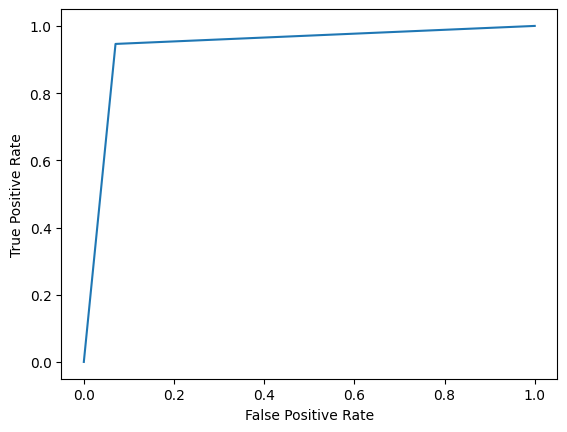

In [ ]:
plot_roc('Decision Tree', y_test_dt_v1, y_pred_decision_tree_sklearn_v1)
plot_roc('Random Forest', y_test_rf_v1, y_pred_random_forest_sklearn_v1)
plt.legend()
plt.title('ROC -Models from sklearn')
plt.show()

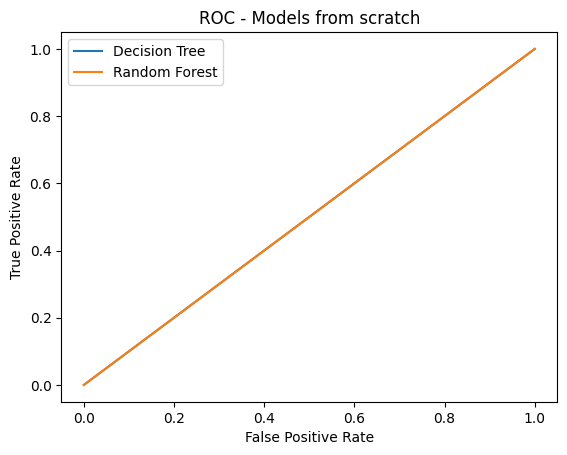

In [ ]:
plot_roc('Decision Tree', y_test_scratch_dt_v1, y_pred_decision_tree_scratch_v1)
plot_roc('Random Forest', y_test_scratch_rf_v1, y_pred_random_forest_scratch_v1)
plt.legend()
plt.title('ROC - Models from scratch')
plt.show()

#### Modification with ... days before the data point and ... days after for labeling

[TODO]

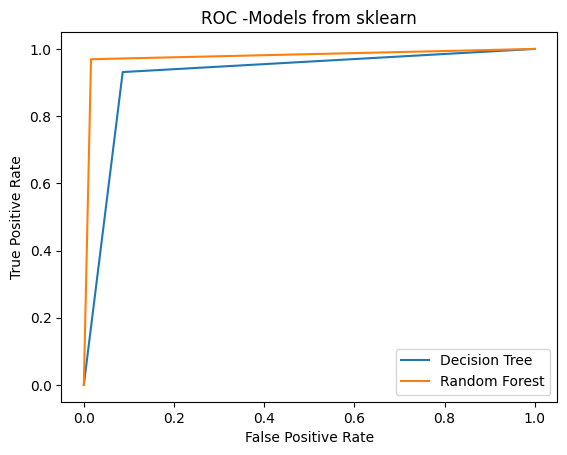

In [ ]:
plot_roc('Decision Tree', y_test_dt_v2, y_pred_decision_tree_sklearn_v2)
plot_roc('Random Forest', y_test_rf_v2, y_pred_random_forest_sklearn_v2)
plt.legend()
plt.title('ROC -Models from sklearn')
plt.show()

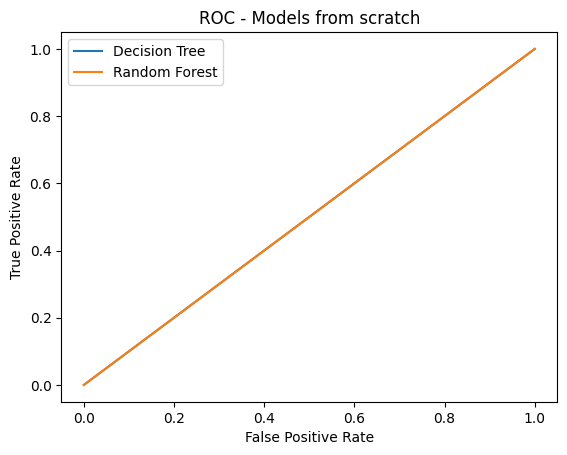

In [ ]:
plot_roc('Decision Tree', y_test_scratch_dt_v2, y_pred_decision_tree_scratch_v2)
plot_roc('Random Forest', y_test_scratch_rf_v2, y_pred_random_forest_scratch_v2)
plt.legend()
plt.title('ROC - Models from scratch')
plt.show()

## Related Work

## Conclusion